In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 设置全局绘图风格
plt.style.use('seaborn-v0_8')  # 使用 seaborn 风格
sns.set(style='darkgrid',context='notebook',font_scale=1.2)
sns.set_context("notebook", font_scale=1.2)  # 设置字体和比例

print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [38]:


# 假设数据集和算法
datasets = ['LiveJournal', 'LSBench', 'Amazon', 'Orkut', 'UK2007']
algorithms = ['Graphflow', 'Symbi', 'Turboflux', 'NewSP', 'CaLiG']
parallel_algorithms = [f'{algo}_Parallel' for algo in algorithms]  # 并行算法
query_sizes = [6,7,8,9,10]  # 示例 query size

# 示例数据占位符（需要替换为你的实际数据）
# 第一张图数据：query_size=8 时每个算法在每个数据集上的平均运行时间（单位：秒）
data_fig1 = pd.DataFrame({
    'Dataset': datasets * len(algorithms),
    'Algorithm': [algo for algo in algorithms for _ in datasets],
    'Time': np.random.rand(len(datasets) * len(algorithms)) * 100  # 占位符
})

# 第二张图数据：Orkut 和 UK2007 上不同 query size 的运行时间
data_fig2 = pd.DataFrame({
    'Query_Size': query_sizes * len(algorithms) * 2,
    'Dataset': ['Orkut'] * len(query_sizes) * len(algorithms) + ['UK2007'] * len(query_sizes) * len(algorithms),
    'Algorithm': [algo for algo in algorithms for _ in query_sizes for _ in range(2)],
    'Time': np.random.rand(len(query_sizes) * len(algorithms) * 2) * 100  # 占位符
})

# 第三张图数据：每个算法的平均内存使用量（单位：MB）
data_fig3 = pd.DataFrame({
    'Algorithm': algorithms,
    'Memory': np.random.rand(len(algorithms)) * 1000  # 占位符
})

# 第四张图数据：并行算法在每个数据集上的平均运行时间
data_fig4 = pd.DataFrame({
    'Dataset': datasets * len(parallel_algorithms),
    'Algorithm': [algo for algo in parallel_algorithms for _ in datasets],
    'Time': np.random.rand(len(datasets) * len(parallel_algorithms)) * 100  # 占位符
})

# 第五张图数据：并行算法的负载均衡（假设用某种指标，例如标准差）
data_fig5 = pd.DataFrame({
    'Algorithm': parallel_algorithms,
    'Load_Balance': np.random.rand(len(parallel_algorithms))  # 占位符
})

# 第六张图数据：去掉技术1、技术2后的性能损失（假设为时间增加百分比）
data_fig6 = pd.DataFrame({
    'Algorithm': algorithms,
    'Tech1_Loss': np.random.rand(len(algorithms)) * 50,  # 占位符
    'Tech2_Loss': np.random.rand(len(algorithms)) * 50   # 占位符
})



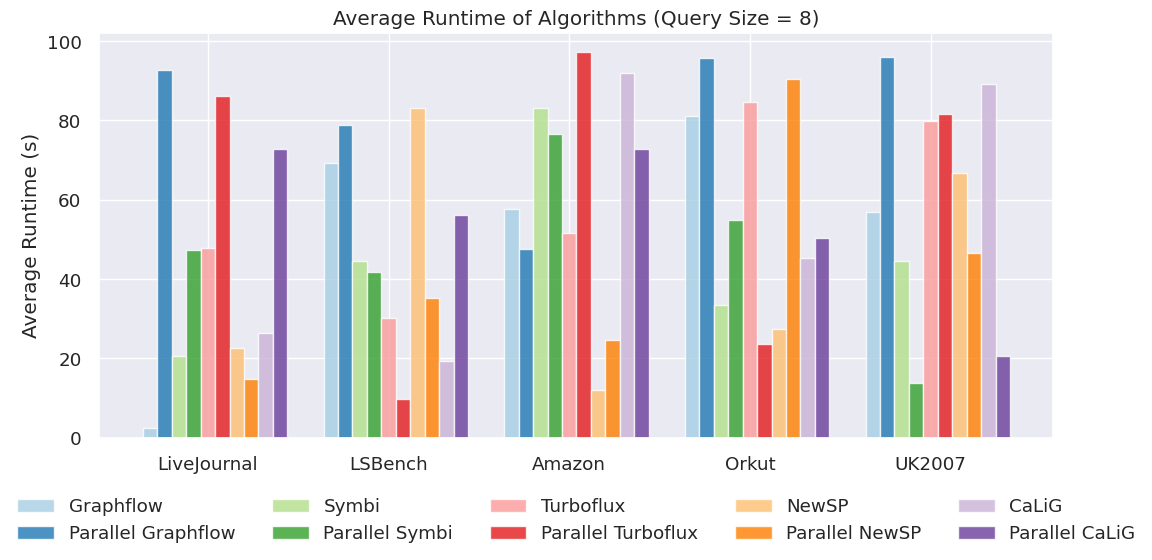

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 设置全局绘图风格
# plt.style.use('seaborn')
sns.set_context("notebook", font_scale=1.2)

# 算法和数据集
single_thread_algorithms = ['Graphflow', 'Symbi', 'Turboflux', 'NewSP', 'CaLiG']
parallel_algorithms = ['Parallel Graphflow', 'Parallel Symbi', 'Parallel Turboflux', 'Parallel NewSP', 'Parallel CaLiG']
all_algorithms = single_thread_algorithms + parallel_algorithms
datasets = ['LiveJournal', 'LSBench', 'Amazon', 'Orkut', 'UK2007']
algorithm_pairs = list(zip(single_thread_algorithms, parallel_algorithms))  # 配对算法

# 示例数据（占位符，替换为你的实际数据）
data_fig1 = pd.DataFrame({
    'Dataset': [ds for ds in datasets for _ in all_algorithms],
    'Algorithm': [algo for _ in datasets for algo in all_algorithms],
    'Time': np.random.rand(len(datasets) * len(all_algorithms)) * 100  # 占位符
})

# 过滤 query_size=8 的数据（假设数据已限定为 query_size=8）
# 如果你的数据包含其他 query_size，请添加过滤：
# data_fig1 = data_fig1[data_fig1['Query_Size'] == 8]

# 第一张图：query_size=8 时每个算法在每个数据集上的平均运行时间
fig, ax = plt.subplots(figsize=(12, 6))

# 设置柱状图参数
bar_width = 0.08  # 每根柱子的宽度
group_width = bar_width * 2  # 每组（单线程+并行）的总宽度
x = np.arange(len(datasets))  # 数据集的 X 轴位置
colors = sns.color_palette("Paired", 10)  # 为每对算法分配颜色

# 绘制双柱状图
for i, (single_algo, parallel_algo) in enumerate(algorithm_pairs):
    # 单线程算法柱子
    single_data = data_fig1[data_fig1['Algorithm'] == single_algo]
    ax.bar(x + i * group_width, single_data['Time'], width=bar_width, label=single_algo, 
           color=colors[i * 2], alpha=0.8)
    
    # 并行算法柱子
    parallel_data = data_fig1[data_fig1['Algorithm'] == parallel_algo]
    ax.bar(x + i * group_width + bar_width, parallel_data['Time'], width=bar_width, label=parallel_algo, 
           color=colors[i * 2 + 1], alpha=0.8)

# 设置 X 轴
# ax.set_xlabel('Dataset')
ax.set_ylabel('Average Runtime (s)')
ax.set_title('Average Runtime of Algorithms (Query Size = 8)')
ax.set_xticks(x + group_width * (len(algorithm_pairs) - 1) / 2)
ax.set_xticklabels(datasets)

# 设置图例，放在图形下方
ax.legend(ncol=5, loc='lower center', bbox_to_anchor=(0.5, -0.3),)

# 调整布局
plt.tight_layout()
plt.subplots_adjust(bottom=0.25)  # 为下方图例预留空间
# plt.savefig('fig1_runtime_qs8.png', bbox_inches='tight')
# save as pdf
plt.savefig('fig1_runtime_qs8.pdf', bbox_inches='tight')
plt.show()

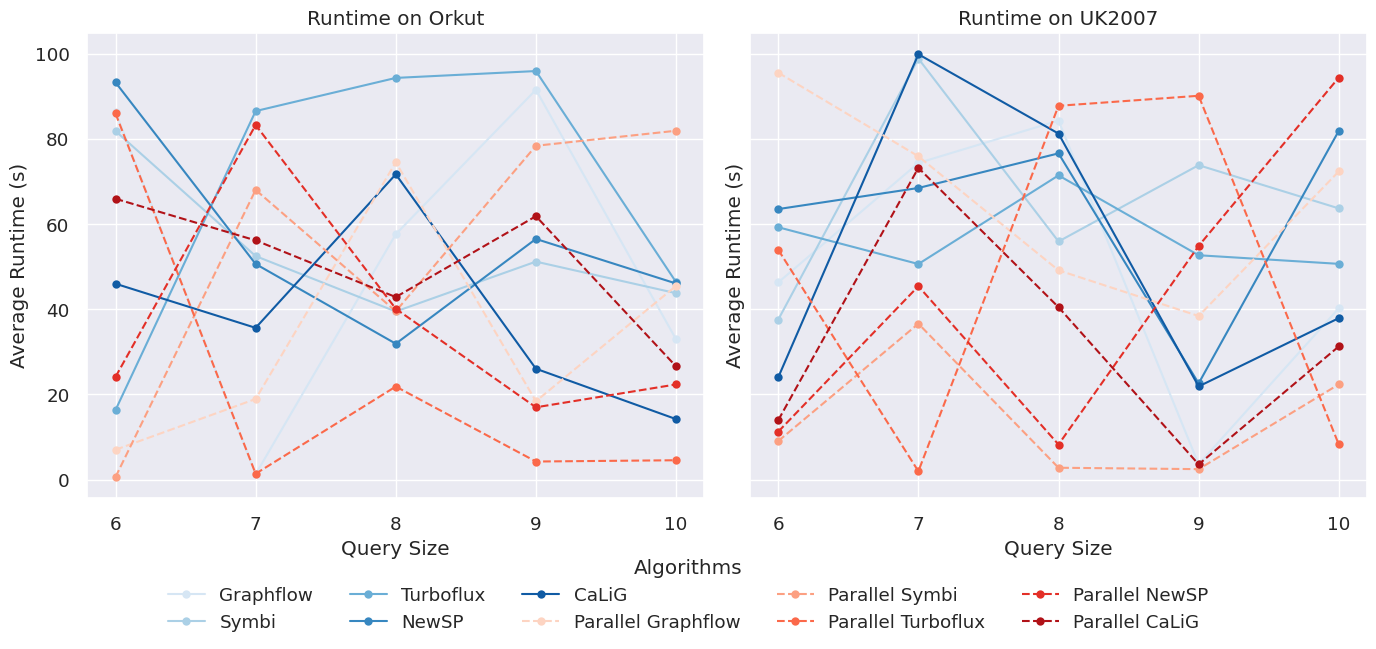

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 设置全局绘图风格
# plt.style.use('seaborn')
sns.set_context("notebook", font_scale=1.2)

# 算法分组
single_thread_algorithms = ['Graphflow', 'Symbi', 'Turboflux', 'NewSP', 'CaLiG']
parallel_algorithms = ['Parallel Graphflow', 'Parallel Symbi', 'Parallel Turboflux', 'Parallel NewSP', 'Parallel CaLiG']
all_algorithms = single_thread_algorithms + parallel_algorithms
datasets = ['Orkut', 'UK2007']
query_sizes = [6, 7, 8, 9, 10]

# 示例数据（占位符，替换为你的实际数据）
data_fig2 = pd.DataFrame({
    'Query_Size': [qs for qs in query_sizes for _ in all_algorithms for _ in datasets],
    'Dataset': [ds for _ in query_sizes for _ in all_algorithms for ds in datasets],
    'Algorithm': [algo for qs in query_sizes for algo in all_algorithms for _ in datasets],
    'Time': np.random.rand(len(query_sizes) * len(all_algorithms) * len(datasets)) * 100  # 占位符
})

# 过滤数据，确保只包含指定 query_sizes
data_fig2 = data_fig2[data_fig2['Query_Size'].isin(query_sizes)]

# 第二张图：Orkut 和 UK2007 上不同 query size 的运行时间
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
for i, dataset in enumerate(['Orkut', 'UK2007']):
    ax = axes[i]
    subset = data_fig2[data_fig2['Dataset'] == dataset]
    
    # 绘制单线程算法（实线，蓝色调）
    for algo in single_thread_algorithms:
        algo_data = subset[subset['Algorithm'] == algo].sort_values('Query_Size')
        ax.plot(algo_data['Query_Size'], algo_data['Time'], marker='o', linestyle='-', 
                label=algo, color=sns.color_palette("Blues", len(single_thread_algorithms))[single_thread_algorithms.index(algo)])
    
    # 绘制并行算法（虚线，红色调）
    for algo in parallel_algorithms:
        algo_data = subset[subset['Algorithm'] == algo].sort_values('Query_Size')
        ax.plot(algo_data['Query_Size'], algo_data['Time'], marker='o', linestyle='--', 
                label=algo, color=sns.color_palette("Reds", len(parallel_algorithms))[parallel_algorithms.index(algo)])
    
    ax.set_xlabel('Query Size')
    ax.set_ylabel('Average Runtime (s)')
    ax.set_title(f'Runtime on {dataset}')
    ax.set_xticks(query_sizes)
    ax.set_xticklabels(query_sizes)

# 添加统一的图例，放在图形下方
fig.legend(labels=all_algorithms, loc='lower center', ncol=5, bbox_to_anchor=(0.5, -0.1), title='Algorithms')
plt.tight_layout()
plt.subplots_adjust(bottom=0.15)  # 调整底部空间以容纳图例
# save as pdf
plt.savefig('fig2_runtime_query_size.pdf', bbox_inches='tight')
# plt.savefig('fig2_runtime_query_size.png', bbox_inches='tight')
plt.show()

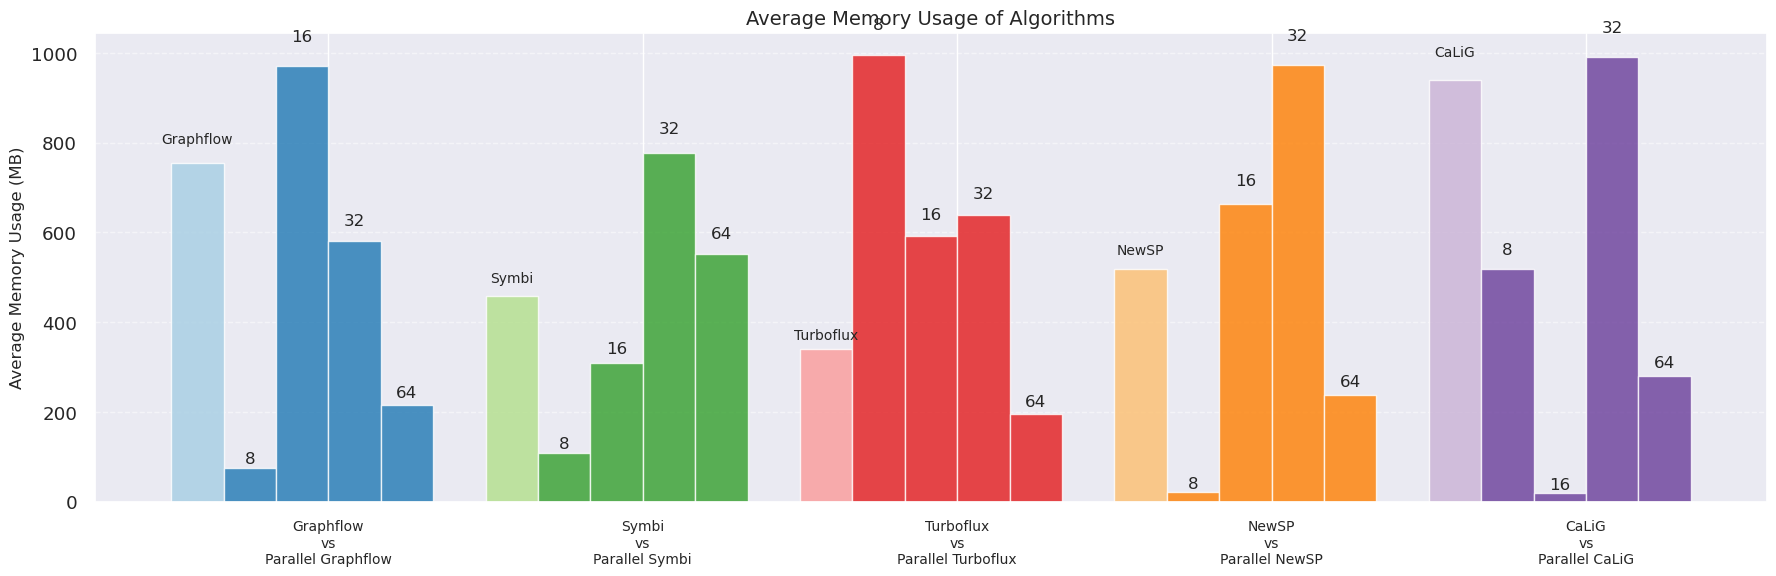

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 设置全局绘图风格
sns.set_context("notebook", font_scale=1.2)

# 算法分组
single_thread_algorithms = ['Graphflow', 'Symbi', 'Turboflux', 'NewSP', 'CaLiG']
parallel_algorithms = ['Parallel Graphflow', 'Parallel Symbi', 'Parallel Turboflux', 'Parallel NewSP', 'Parallel CaLiG']
threads = [8, 16, 32, 64]  # 线程数
algorithm_pairs = list(zip(single_thread_algorithms, parallel_algorithms))  # 配对算法

# 示例数据（占位符，替换为你的实际数据）
data_fig3 = []
for single_algo, parallel_algo in algorithm_pairs:
    # 单线程算法数据
    data_fig3.append({
        'Algorithm': single_algo,
        'Threads': 'Single',
        'Memory': np.random.rand(1)[0] * 1000  # 占位符，单位：MB
    })
    # 并行算法数据（不同线程数）
    for thread in threads:
        data_fig3.append({
            'Algorithm': parallel_algo,
            'Threads': thread,
            'Memory': np.random.rand(1)[0] * 1000  # 占位符，单位：MB
        })
data_fig3 = pd.DataFrame(data_fig3)

# 第三张图：每个算法的平均内存使用量（单张长图）
fig, ax = plt.subplots(figsize=(18, 6))  # 宽图，适应 30 根柱子

# 设置柱状图参数
bar_width = 0.12  # 每根柱子的宽度
group_width = bar_width * 6  # 每组（单线程 + 4 线程版本）的宽度
x_base = np.arange(len(algorithm_pairs)) * group_width  # 每组算法对的基础位置
colors = sns.color_palette("Paired", 12)  # 为单线程和并行分配颜色

# 绘制柱状图并在柱子上方标注
for i, (single_algo, parallel_algo) in enumerate(algorithm_pairs):
    # 单线程柱子
    single_data = data_fig3[(data_fig3['Algorithm'] == single_algo) & (data_fig3['Threads'] == 'Single')]
    single_memory = single_data['Memory'].iloc[0] if not single_data.empty else 0
    single_bar = ax.bar(
        x_base[i],
        single_memory,
        width=bar_width,
        color=colors[i * 2],
        alpha=0.8
    )
    # 标注单线程算法名
    ax.text(
        single_bar[0].get_x() + single_bar[0].get_width() / 2,
        single_memory + single_memory * 0.05,  # 稍高于柱子
        single_algo,
        ha='center',
        va='bottom',
        fontsize=10,
        # rotation=45
    )
    
    # 并行算法柱子（按线程数）
    parallel_data = data_fig3[(data_fig3['Algorithm'] == parallel_algo)]
    for j, thread in enumerate(threads):
        memory = parallel_data[parallel_data['Threads'] == thread]['Memory'].iloc[0] if not parallel_data[parallel_data['Threads'] == thread].empty else 0
        parallel_bar = ax.bar(
            x_base[i] + (j + 1) * bar_width,
            memory,
            width=bar_width,
            color=colors[i * 2 + 1],
            alpha=0.8
        )
        # 标注线程数
        ax.text(
            parallel_bar[0].get_x() + parallel_bar[0].get_width() / 2,
            memory + memory * 0.05,
            f'{thread}',
            ha='center',
            va='bottom',
            fontsize=12,
            # rotation=45
        )

# 设置 X 轴和 Y 轴
ax.set_ylabel('Average Memory Usage (MB)', fontsize=12)
ax.set_title('Average Memory Usage of Algorithms', fontsize=14)
ax.set_xticks(x_base + group_width / 2 - bar_width / 2)
ax.set_xticklabels([f'{single_algo}\nvs\n{parallel_algo}' for single_algo, parallel_algo in algorithm_pairs], fontsize=10)

# 添加网格线
ax.grid(True, axis='y', linestyle='--', alpha=0.5)

# 调整布局
plt.tight_layout()
plt.savefig('fig3_memory_usage.pdf', bbox_inches='tight')
plt.show()

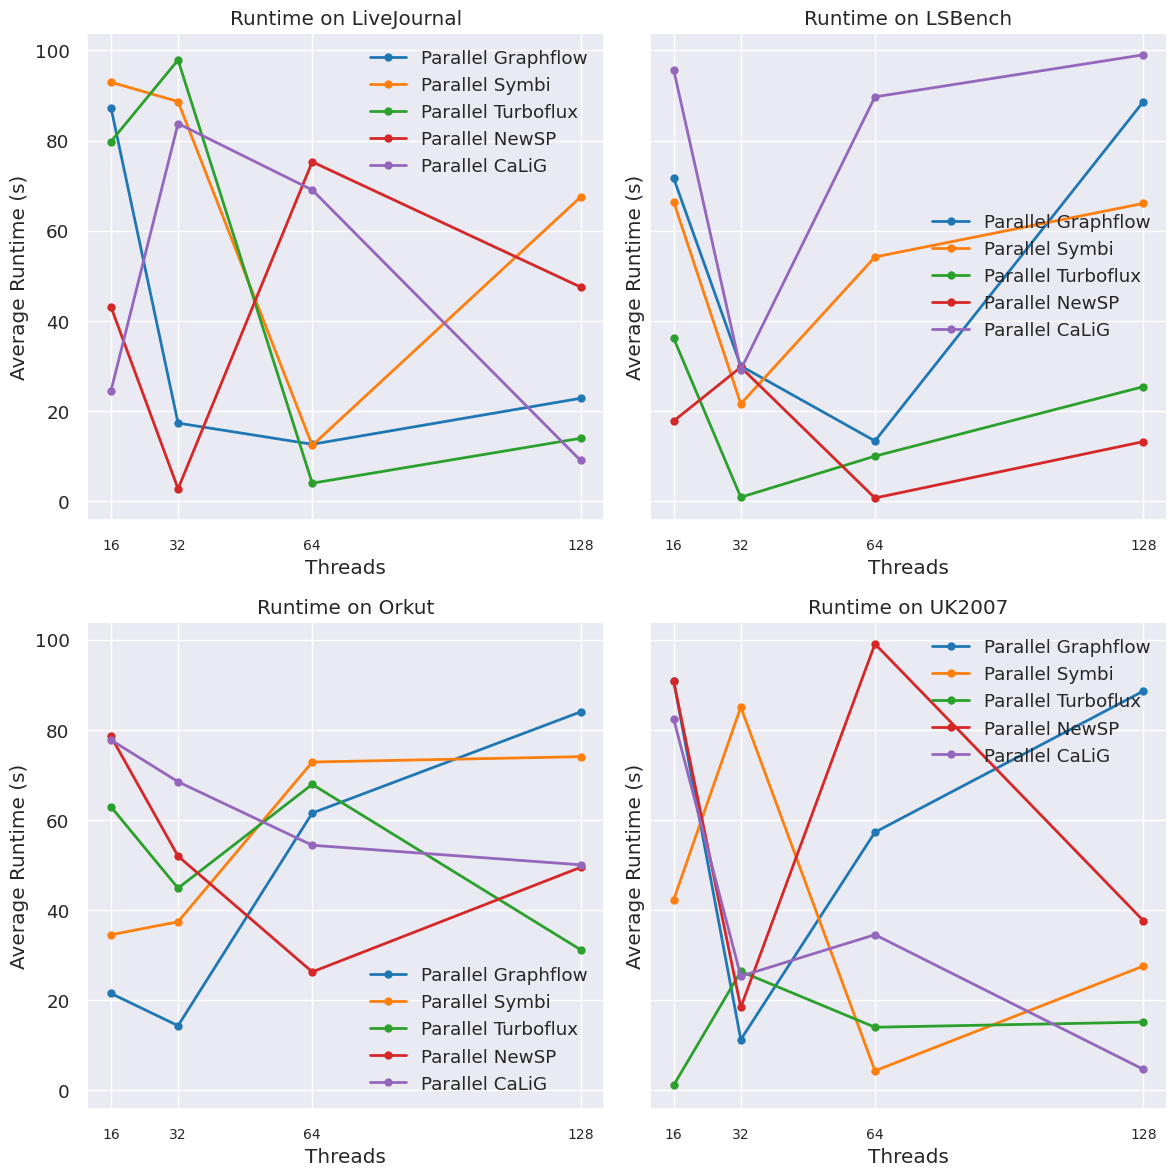

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 设置全局绘图风格
sns.set_context("notebook", font_scale=1.2)

# 算法和数据集
parallel_algorithms = ['Parallel Graphflow', 'Parallel Symbi', 'Parallel Turboflux', 'Parallel NewSP', 'Parallel CaLiG']
datasets = ['LiveJournal', 'LSBench', 'Orkut', 'UK2007']
threads = [16, 32, 64, 128]  # 线程数

# 示例数据（占位符，替换为你的实际数据）
data_fig4 = pd.DataFrame({
    'Dataset': [ds for ds in datasets for _ in parallel_algorithms for _ in threads],
    'Algorithm': [algo for _ in datasets for algo in parallel_algorithms for _ in threads],
    'Threads': [thread for _ in datasets for _ in parallel_algorithms for thread in threads],
    'Time': np.random.rand(len(datasets) * len(parallel_algorithms) * len(threads)) * 100  # 占位符，单位：秒
})

# 过滤数据，确保只包含指定线程数
data_fig4 = data_fig4[data_fig4['Threads'].isin(threads)]

# 第四张图：并行算法在每个数据集上的平均运行时间（按数据集分图）
fig, axes = plt.subplots(2, 2, figsize=(12, 12), sharey=True)  # 2x2 布局，调整大小
axes = axes.flatten()  # 展平以便迭代

# 颜色设置
colors = sns.color_palette("tab10", len(parallel_algorithms))  # 为每个算法分配颜色

for i, dataset in enumerate(datasets):
    ax = axes[i]
    subset = data_fig4[data_fig4['Dataset'] == dataset]
    
    # 绘制每个算法的折线
    for j, algo in enumerate(parallel_algorithms):
        algo_data = subset[subset['Algorithm'] == algo].sort_values('Threads')
        if not algo_data.empty:  # 确保数据不为空
            ax.plot(algo_data['Threads'], algo_data['Time'], marker='o', linestyle='-', 
                    label=algo, color=colors[j], linewidth=2)
    
    # 设置子图
    ax.set_xlabel('Threads')
    ax.set_ylabel('Average Runtime (s)')
    ax.set_title(f'Runtime on {dataset}')
    ax.set_xticks(threads)
    ax.set_xticklabels(threads, fontsize=10)
    ax.legend()

# 调整布局
plt.tight_layout()
# plt.savefig('fig4_parallel_runtime.png', bbox_inches='tight')
# save as pdf
plt.savefig('fig4_parallel_runtime.pdf', bbox_inches='tight')
plt.show()

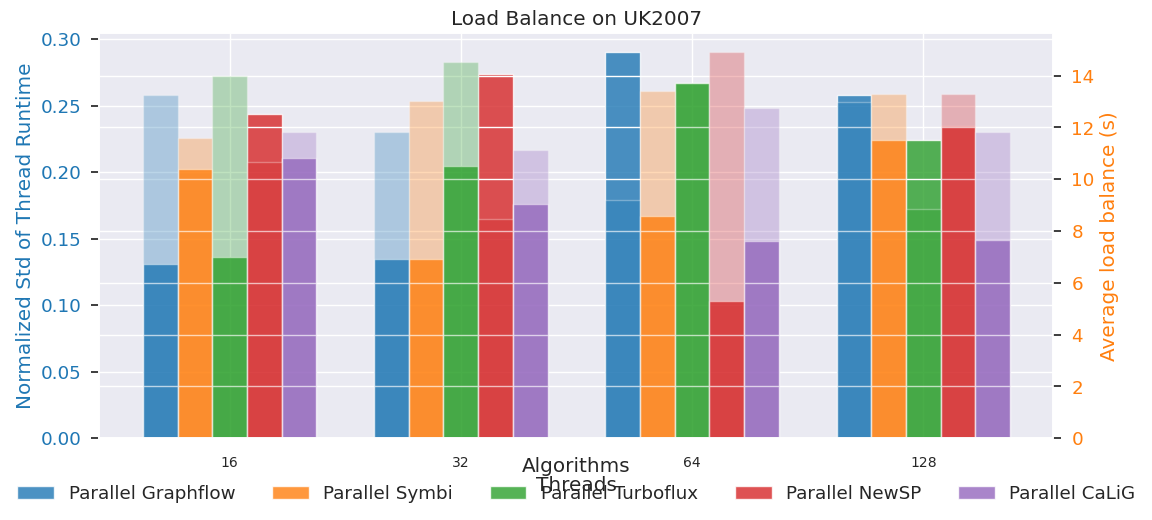

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 设置全局绘图风格
sns.set_context("notebook", font_scale=1.2)

# 算法和线程数
parallel_algorithms = ['Parallel Graphflow', 'Parallel Symbi', 'Parallel Turboflux', 'Parallel NewSP', 'Parallel CaLiG']
threads = [16, 32, 64, 128]

# 示例数据（占位符，替换为你的实际数据）
data_fig5 = pd.DataFrame({
    'Algorithm': [algo for algo in parallel_algorithms for _ in threads],
    'Threads': [thread for _ in parallel_algorithms for thread in threads],
    'LoadBalance': np.random.uniform(0.1, 0.3, len(parallel_algorithms) * len(threads)),  # 归一化标准差
    'MeanRuntime': np.random.uniform(8, 15, len(parallel_algorithms) * len(threads))  # 平均运行时间（秒）
})

# 过滤数据，确保只包含指定线程数
data_fig5 = data_fig5[data_fig5['Threads'].isin(threads)]

# 第五张图：UK2007 上并行算法的负载均衡比较（柱状图）
fig, ax1 = plt.subplots(figsize=(12, 6))

# 设置柱状图参数
bar_width = 0.15  # 每根柱子的宽度
group_width = bar_width * len(parallel_algorithms)  # 每组柱子的总宽度
x = np.arange(len(threads))  # 线程数的位置
colors = sns.color_palette("tab10", len(parallel_algorithms))  # 为每个算法分配颜色

# 绘制负载均衡柱子（左 Y 轴）
for j, algo in enumerate(parallel_algorithms):
    algo_data = data_fig5[data_fig5['Algorithm'] == algo].sort_values('Threads')
    if not algo_data.empty:
        ax1.bar(x + j * bar_width - group_width / 2 + bar_width / 2, algo_data['LoadBalance'], 
                width=bar_width, label=algo, color=colors[j], alpha=0.8)

# 设置左 Y 轴
ax1.set_xlabel('Threads')
ax1.set_ylabel('Normalized Std of Thread Runtime', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_xticks(x)
ax1.set_xticklabels(threads, fontsize=10)
ax1.set_title('Load Balance on UK2007')

# 创建右 Y 轴（运行时间）
ax2 = ax1.twinx()
for j, algo in enumerate(parallel_algorithms):
    algo_data = data_fig5[data_fig5['Algorithm'] == algo].sort_values('Threads')
    if not algo_data.empty:
        ax2.bar(x + j * bar_width - group_width / 2 + bar_width / 2, algo_data['MeanRuntime'], 
                width=bar_width, color=colors[j], alpha=0.3)  # 透明度区分运行时间

# 设置右 Y 轴
ax2.set_ylabel('Average load balance (s)', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# 设置图例
ax1.legend(ncol=5, loc='lower center', bbox_to_anchor=(0.5, -0.2), title='Algorithms')

# 调整布局
plt.tight_layout()
plt.subplots_adjust(bottom=0.25)  # 为图例预留空间
# plt.savefig('fig5_load_balance.png', bbox_inches='tight')
#save as pdf
plt.savefig('fig5_load_balance.pdf', bbox_inches='tight')

plt.show()

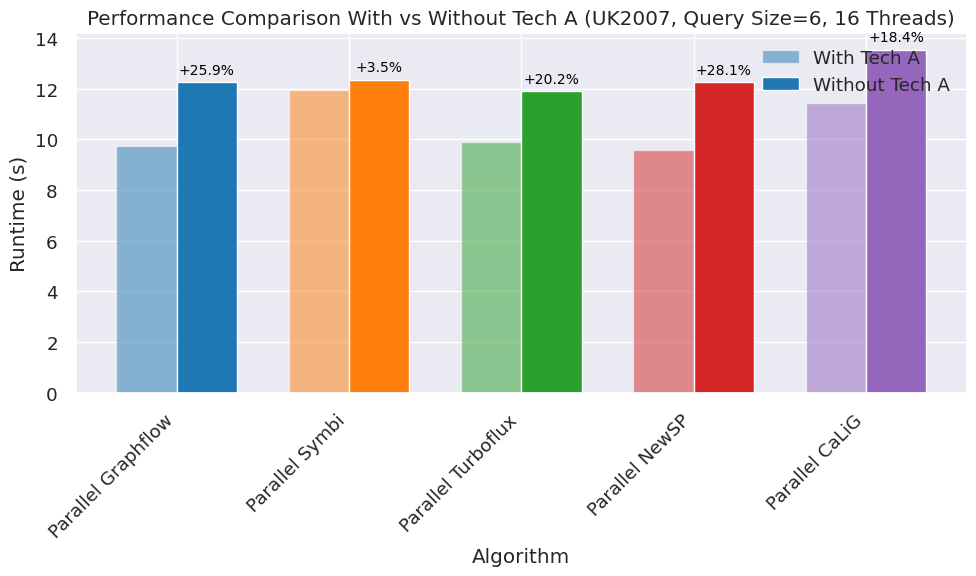

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 设置全局绘图风格
sns.set_context("notebook", font_scale=1.2)

# 算法
parallel_algorithms = ['Parallel Graphflow', 'Parallel Symbi', 'Parallel Turboflux', 'Parallel NewSP', 'Parallel CaLiG']

# 示例数据（占位符，替换为你的实际数据）
data_fig6 = pd.DataFrame({
    'Algorithm': parallel_algorithms,
    'Time_TechA': np.random.uniform(9, 12, len(parallel_algorithms)),  # 使用技术 A 的运行时间（秒）
    'Time_NoTechA': np.random.uniform(10, 14, len(parallel_algorithms)),  # 不使用技术 A 的运行时间（秒）
})
# 计算性能损失
data_fig6['TechA_Loss'] = (data_fig6['Time_NoTechA'] - data_fig6['Time_TechA']) / data_fig6['Time_TechA'] * 100

# 第六张图：技术 A 与无技术 A 的性能比较
fig, ax = plt.subplots(figsize=(10, 6))

# 设置柱状图参数
bar_width = 0.35  # 每根柱子的宽度
x = np.arange(len(parallel_algorithms))
colors = sns.color_palette("tab10", len(parallel_algorithms))  # 为每个算法分配颜色

# 绘制柱状图
# 使用技术 A 的柱子
bars_tech_a = ax.bar(x - bar_width/2, data_fig6['Time_TechA'], bar_width, 
                     label='With Tech A', color=[c for c in colors], alpha=0.5)
# 不使用技术 A 的柱子
bars_no_tech_a = ax.bar(x + bar_width/2, data_fig6['Time_NoTechA'], bar_width, 
                        label='Without Tech A', color=[c for c in colors], alpha=1.0)

# 在不使用技术 A 的柱子上方标注性能损失
for i, bar in enumerate(bars_no_tech_a):
    height = bar.get_height()
    loss = data_fig6['TechA_Loss'].iloc[i]
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.2, f'+{loss:.1f}%', 
            ha='center', va='bottom', fontsize=10, color='black')

# 设置轴和标题
ax.set_xlabel('Algorithm')
ax.set_ylabel('Runtime (s)')
ax.set_title('Performance Comparison With vs Without Tech A (UK2007, Query Size=6, 16 Threads)')
ax.set_xticks(x)
ax.set_xticklabels(parallel_algorithms, rotation=45, ha='right')
ax.legend()

# 调整布局
plt.tight_layout()
plt.savefig('fig6_tech_loss.png', bbox_inches='tight')

# save as pdf
plt.savefig('fig6_tech_loss.pdf', bbox_inches='tight')
plt.show()